1. $x^{(k+1)}=x^{(k)}-\eta \bullet {}_0^R \mathscr{D}_x^\alpha f(x^{(k)})$

2. $f(x) = {x^2} + 6x + 9$

3. ${}_0^R \mathscr{D}_x^\alpha f(x)=sign(x)\frac{{2}}{{\Gamma (3 - \alpha )}}{|x|^{2 - \alpha }} + \frac{6}{{\Gamma (2 - \alpha )}}{(|x|+\epsilon)^{1 - \alpha }} + sign(x) \frac{9}{{\Gamma \left( {1 - \alpha } \right)}}{(|x|+\epsilon)^{ - \alpha }}$

4. ${}_0^R \mathscr{D}_x^\alpha f(x)=sign(x)\frac{{2}}{{\Gamma (3 - \alpha )}}{|x|^{2 - \alpha }} + \frac{6}{{\Gamma (2 - \alpha )}}{(|x|+\epsilon)^{1 - \alpha }} + {e^{ - \theta k}} \bullet sign(x) \frac{9}{{\Gamma \left( {1 - \alpha } \right)}}{(|x|+\epsilon)^{ - \alpha }}$

In [ ]:
import numpy as np
from scipy.special import gamma

#Equation 3
def expression1_differentiation(x, alpha=0.9, epsilon=1e-8):
    sign_x = np.sign(x)
    abs_x = np.abs(x)
    
    term1 = sign_x * (2/gamma(3 - alpha)) * (abs_x **(2-alpha))
    term2 = (6/gamma(2 - alpha)) * ((abs_x + epsilon)  **(1 - alpha))
    term3 = sign_x * (9/gamma(1 - alpha)) * ((abs_x + epsilon)**(-alpha))
    
    return term1 + term2 + term3

#Equation 4
def expression1_differentiation_ED(x, i, alpha=0.9, epsilon=1e-8, k=0.9):
    sign_x = np.sign(x)
    abs_x = np.abs(x)
    
    term1 = sign_x * (2/gamma(3 - alpha)) * (abs_x **(2-alpha))
    term2 = (6/gamma(2 - alpha)) * ((abs_x + epsilon)  **(1 - alpha))
    term3_ED = np.exp(-k * i) * sign_x * (9/gamma(1 - alpha)) * ((abs_x + epsilon)**(-alpha))
    
    return term1 + term2 + term3_ED

#Equation 2
def expression1_function(x):
    return x**2 + 6*x + 9

#FGD
def FGD(x0 = 10, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8):
    dif = [x0]
    dif_x = []
    x = x0
    for i in range(max_iter):
        gradient = expression1_differentiation(x, alpha, epsilon)
        x -= lr * gradient
        dif.append(x)
        dif_x.append(lr * gradient)
    return dif, dif_x

#FGD_ED
def FGD_ED(x0 = 10, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8, k=0.9):
    dif = [x0]
    dif_x = []
    x = x0
    for i in range(max_iter):
        gradient = expression1_differentiation_ED(x, i, alpha, epsilon, k)
        x -= lr * gradient
        dif.append(x)
        dif_x.append(lr * gradient)
    return dif, dif_x

#GD
def GD(x0 = 10, lr = 0.3, max_iter=10):
    dif = [x0]
    x = x0
    m = 0
    for i in range(max_iter):
        gradient = 2*x + 6
        # m = 0.1*m + gradient
        # x -= lr * m
        x -= lr * gradient
        dif.append(x)
    return dif

In [8]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'
custom_params = {
    'font.size': 20,
    'lines.linewidth': 1,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
}

[20.0, 13.98526311729746, 9.675751307871188, 6.551783691908362, 4.262153743829979, 2.565769681292667, 1.2934465005872327, 0.3176382001740702, -0.5643960146695861, -0.899849010560251, -1.2497128935588615, -1.5729823429843413, -1.8554084507223705, -2.0948577610356844, -2.294231678488132, -2.4582879556410666, -2.592187454526003, -2.7008378402399926, -2.788622873132955, -2.859321864344878, -2.9161213493637708, -2.961668377635876, -2.9981390813234747, -3.027309063418769, -3.0506191005477277, -3.0692334172445617, -3.084089788374402, -3.0959417445735236, -3.105393627481664, -3.112929413968298, -3.1189362422717815, -3.1237235080524255, -3.127538299779764, -3.1305778352214926, -3.1329994568705817, -3.134928649976038, -3.1364654646832655, -3.1376896538496237, -3.1386647795572538, -3.1394414929260073, -3.1400601521334264, -3.1405529112169557, -3.140945386029912, -3.1412579825661107, -3.141506955836289, -3.1417052537995147, -3.1418631898845484, -3.141988978854307, -3.1420891637430812, -3.142168955

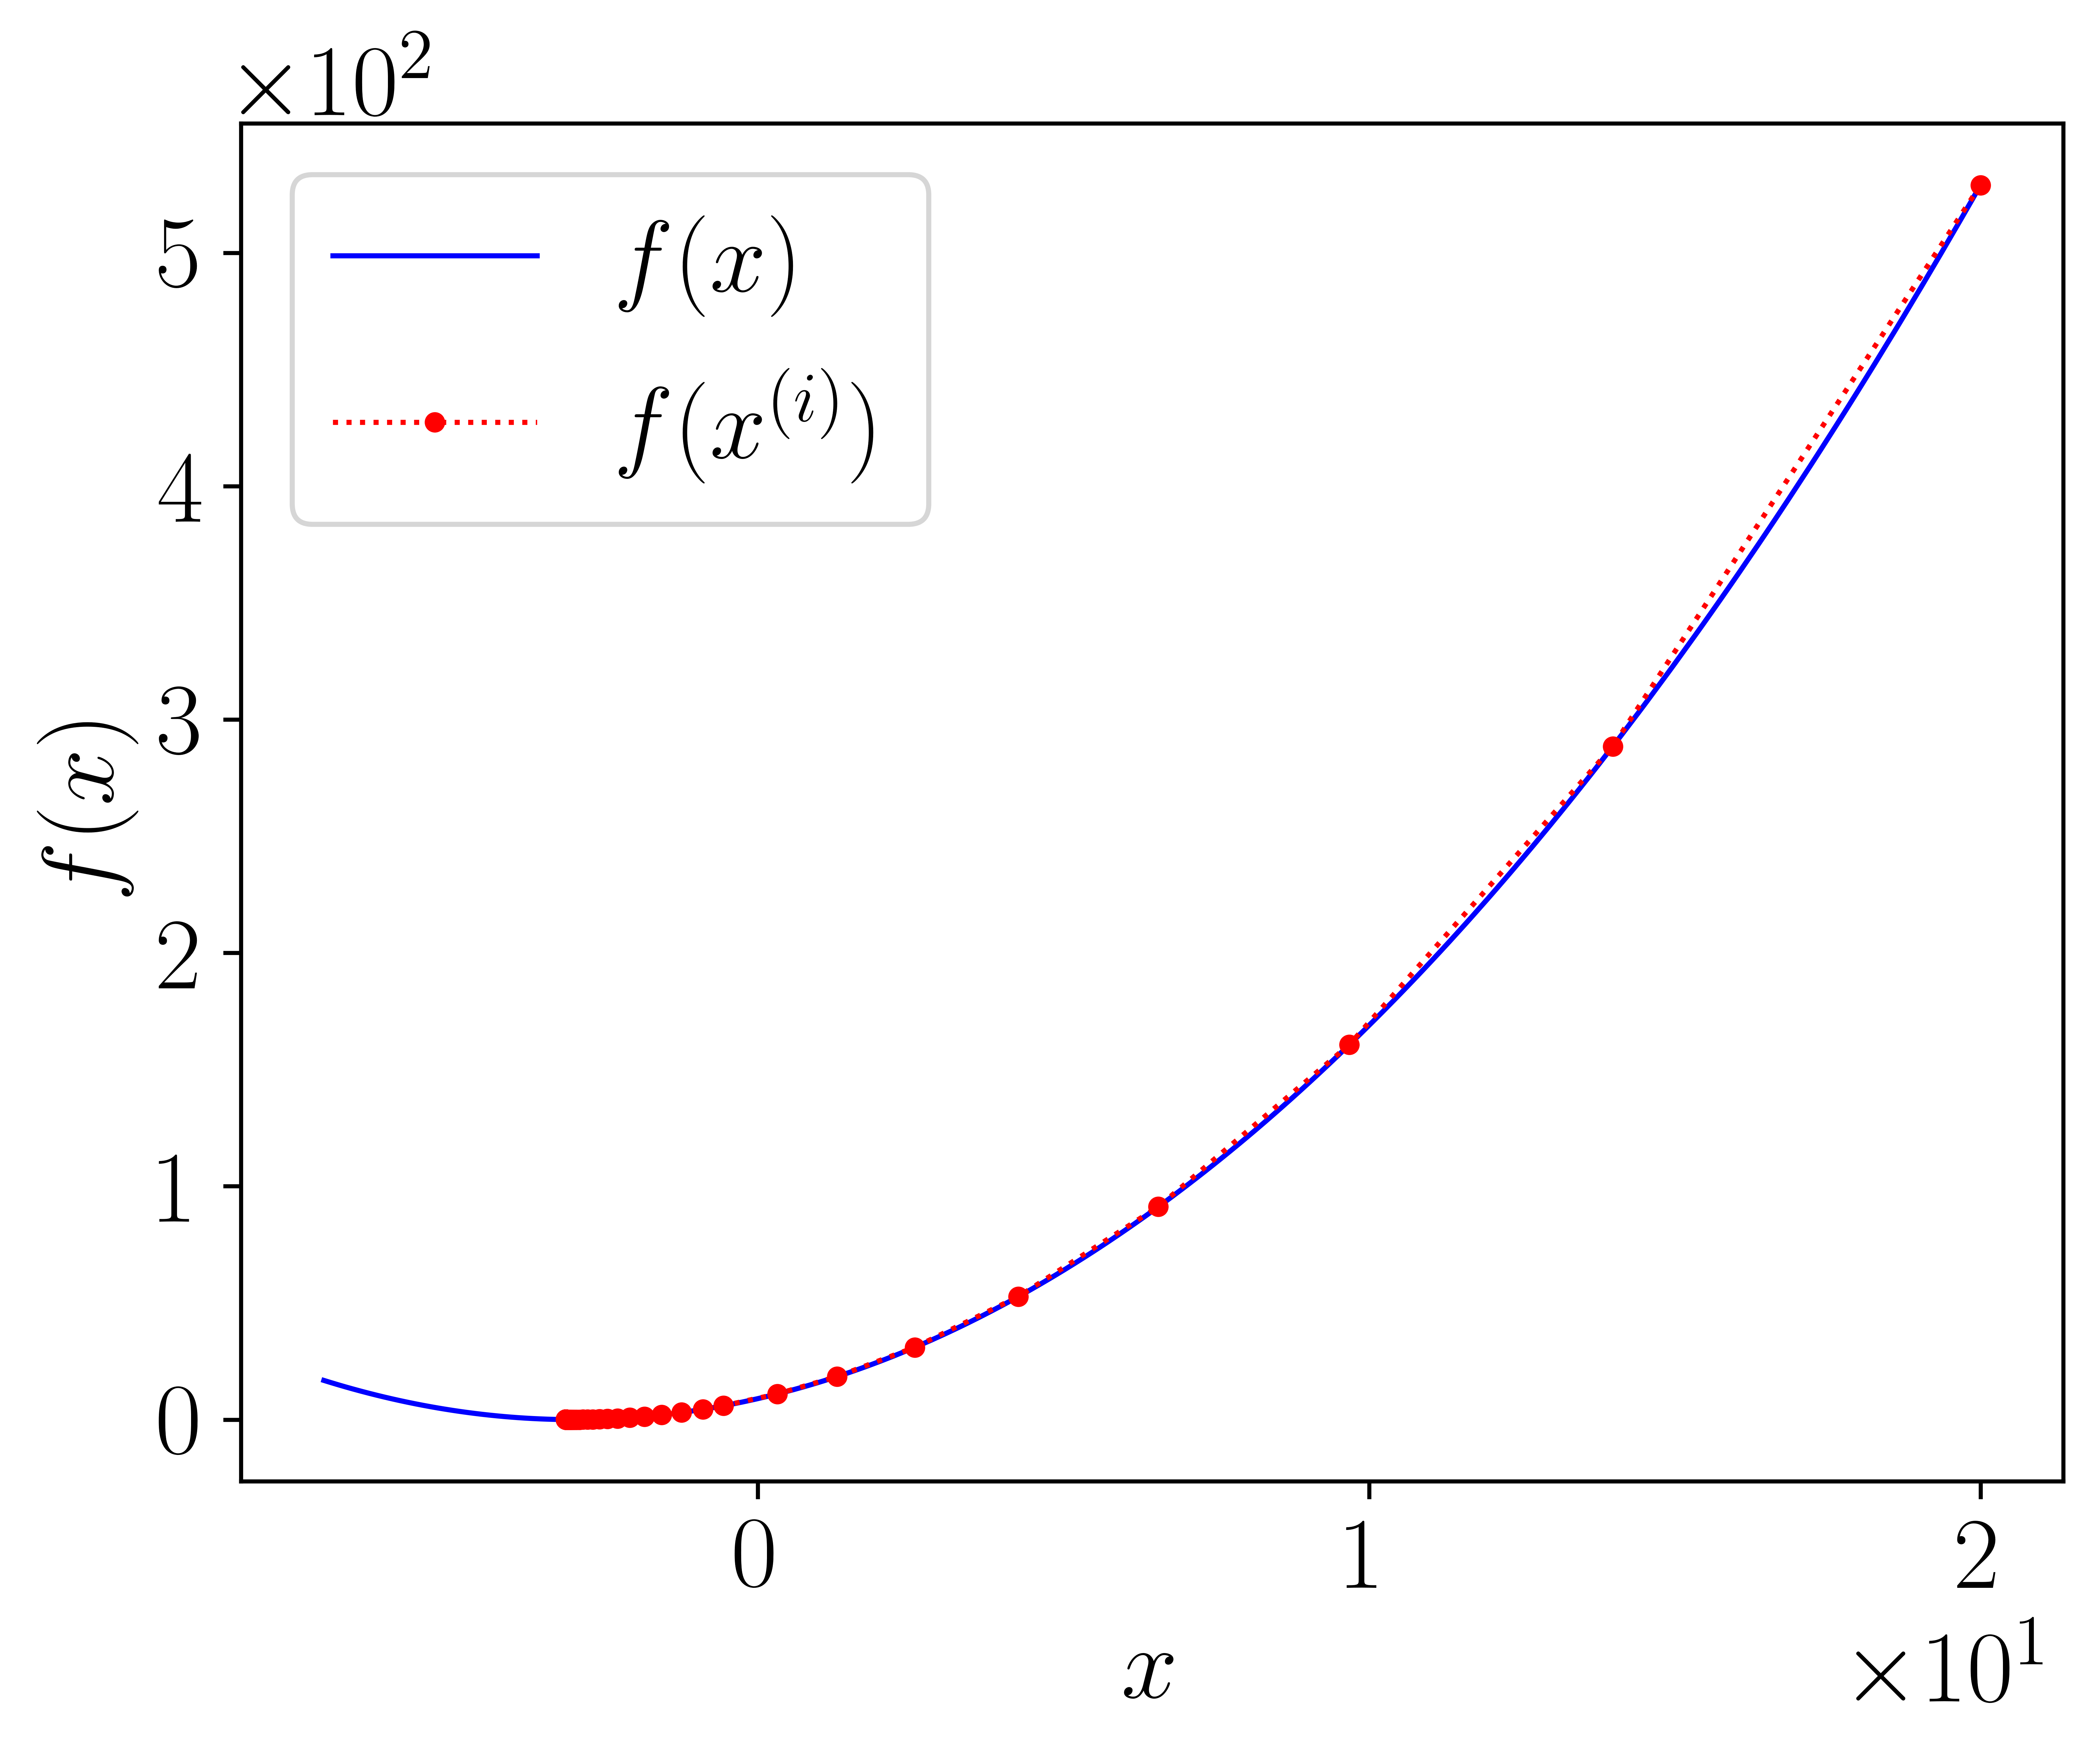

In [14]:
#fig1(a)
import matplotlib.pyplot as plt
import torch as t

fig = plt.figure(dpi=1200)    #dpi=1200 to order to save the picture in high resolution.
plt.rcParams.update(custom_params)

x = t.arange(-7.1, 20,0.0001)
y = expression1_function(x)

x0 = 20.0
lr = 0.1
alpha = 0.9
max_iter = 100
epsilon = 1e-8
x1,dif_x1 = FGD(x0,lr,alpha,max_iter,epsilon)
print(x1)
y1 = expression1_function(t.tensor(x1))

plt.ticklabel_format(axis='both', style='sci', scilimits=(2, 6))
plt.plot(x,y,color='blue',label='$f(x)$')
plt.plot(x1,y1,color='red',linestyle=':',marker='o',markersize=3,label='$f(x^{(i)})$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
# plt.grid()
plt.savefig('picture/fig1/Fig1(a).svg',bbox_inches='tight',format='svg')
plt.savefig('picture/fig1/Fig1(a).pdf',bbox_inches='tight',format='pdf')
plt.show()

[1.0, 0.7250798940131685, 0.46370065172320385, 0.20719517077462413, -0.08162765675107786, 0.04537069337417149, -0.5545277504656547, -0.6546760644229517, -0.7585016002985585, -0.8638484566441554, -0.9691187486122903, -1.0731473441189547, -1.1750943157186422, -1.274362215068128, -1.3705347557970924, -1.4633317529166572, -1.552575885452464, -1.638167960249926, -1.7200683039394082, -1.7982826122943885, -1.872851080089537, -1.94383997607126, -2.0113350634196827, -2.0754364298243138, -2.1362544061442836, -2.193906334132979, -2.248514002288719, -2.3002016115396944, -2.3490941639119276, -2.395316190792864, -2.438990755119501, -2.4802386753448658, -2.5191779294691217, -2.5559232055467223, -2.590585571465917, -2.6232722418559025, -2.65408642401575, -2.68312722800608, -2.7104896286710276, -2.7362644694950324, -2.7605384999465463, -2.7833944393964423, -2.804911061883193, -2.825163296977333, -2.8442223428119155, -2.862155788023697, -2.879027739915629, -2.8948989566244285, -2.909826981473209, -2.923

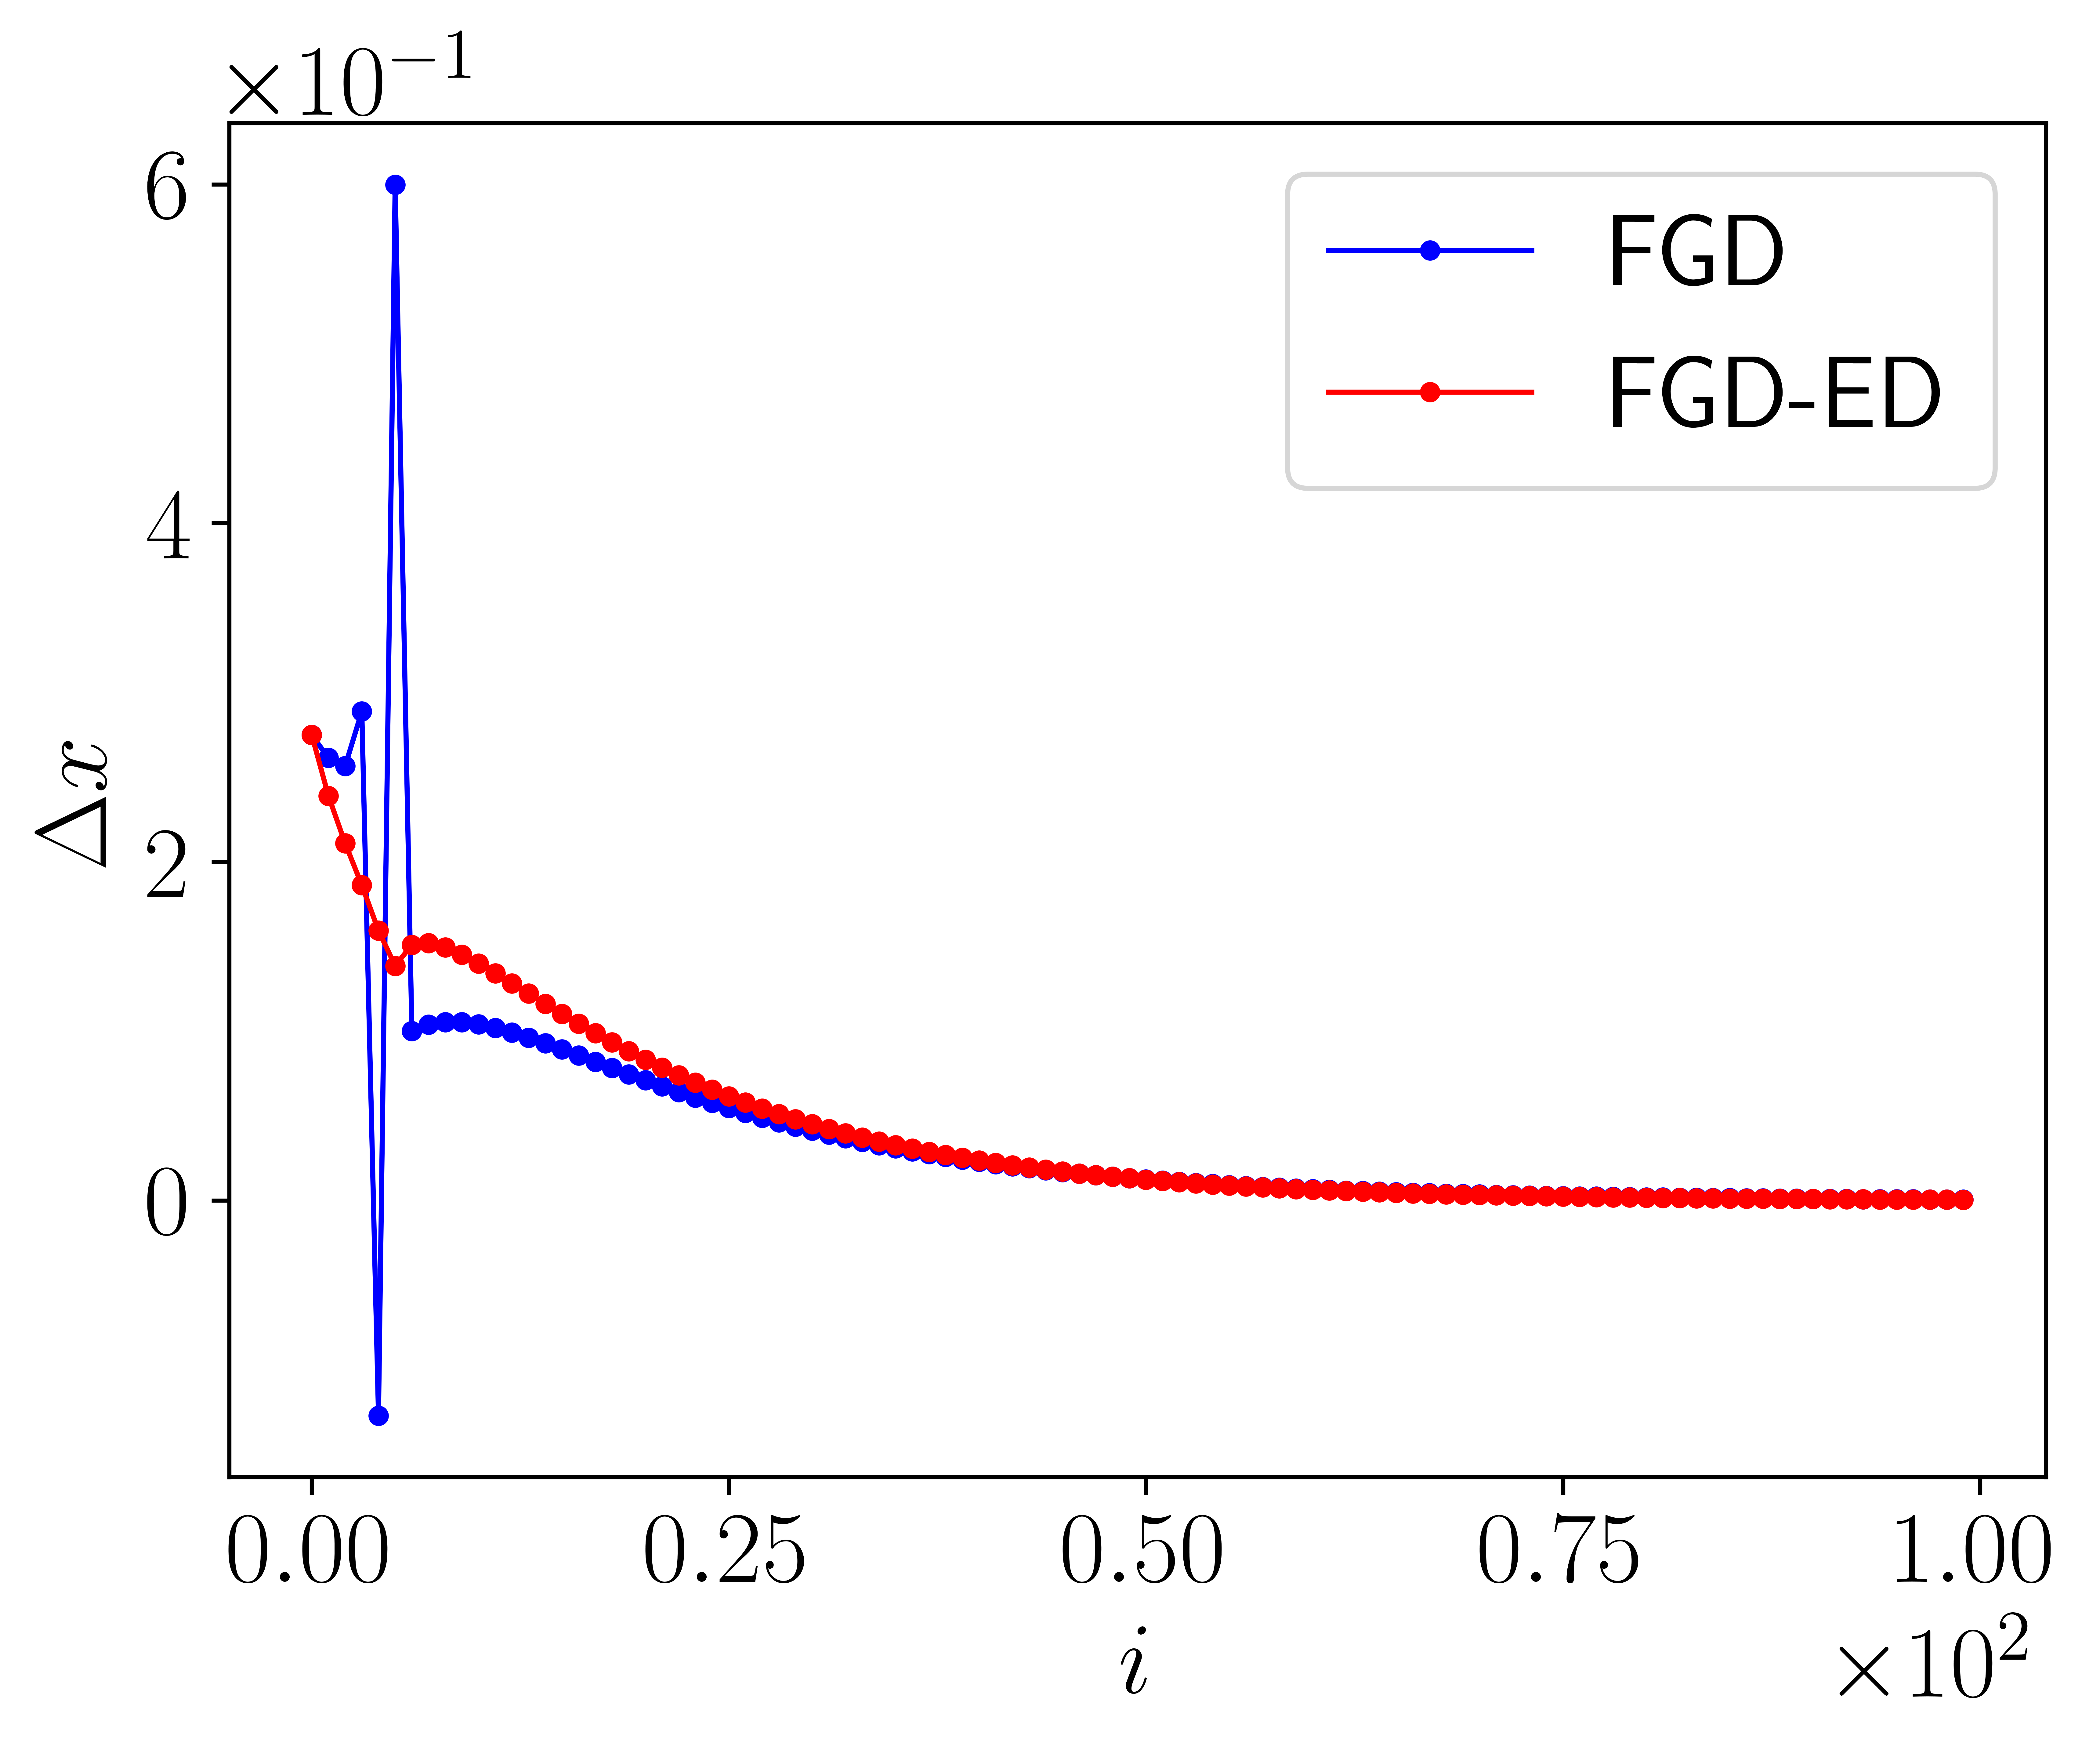

In [16]:
#FGD and FGD-ED in different hyper-parameter
import matplotlib.pyplot as plt
import torch as t

fig = plt.figure(dpi=1200)     
plt.rcParams.update(custom_params)

lr = 3e-2
max_iter = 100
epsilon = 1e-8
x0 = 1.0    
alpha = 0.9   #0.3,0.5,0.7,0.9,1.0
#k is the exponential decay coefficient.
k = 0.9   

x1,dif_x1 = FGD(x0,lr,alpha,max_iter,epsilon)
print(x1)
y1 = expression1_function(t.tensor(x1))

x1_ED,dif_x1_ED = FGD_ED(x0,lr,alpha,max_iter,epsilon,k)
print(x1_ED)
y1_ED = expression1_function(t.tensor(x1_ED))

plt.ticklabel_format(axis='both', style='sci', scilimits=(2, 6))
plt.xlabel(r'$i$')
plt.ylabel(r'$\Delta x$')
plt.plot(dif_x1,color='blue',marker='o',markersize=3,label=r'FGD')
plt.plot(dif_x1_ED,color='red',marker='o',markersize=3,label=r'FGD-ED')
# plt.axhline(0,color='gray',linestyle='--',linewidth=1)
plt.legend()
# plt.grid()
plt.savefig('picture/fig1/Fig1'+'_'+str(x0)+'_'+str(alpha)+'_'+str(k)+'.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/fig1/Fig1'+'_'+str(x0)+'_'+str(alpha)+'_'+str(k)+'.pdf',bbox_inches='tight',format='pdf')
plt.show()

[1.0, 0.5273496586545463, 0.24902381803214607, 0.08631493417373451, -0.00666176499879334, 0.047722948785026253, 0.007399640171469914, -0.015411539986005422, -0.008197245167103876, -0.003192421508365766, 0.0007332344911566728, -0.0030530450861926527, -0.0022295258603118894, -0.0018443241764213858, -0.0017790244404953682, -0.001972007901626122, -0.002399306803578665, -0.003064902532583977, -0.00399589208619946, -0.005239957229227602, -0.006864513075718061, -0.00895732126922657, -0.011628309273845314, -0.015012360172275193, -0.019272906767723336, -0.024606223139202216, -0.031246340217956768, -0.03947052026141819, -0.049605211464425536, -0.06203236997499392, -0.07719598200894023, -0.09560854198829971, -0.11785714147311672, -0.14460869622159878, -0.1766136845614893, -0.2147075919704931, -0.2598090620403633, -0.31291355827017536, -0.37508117058162554, -0.44741709494002735, -0.5310433294834085, -0.6270603366090889, -0.7364978977584804, -0.8602552135602959, -0.9990315291129025, -1.153250188486

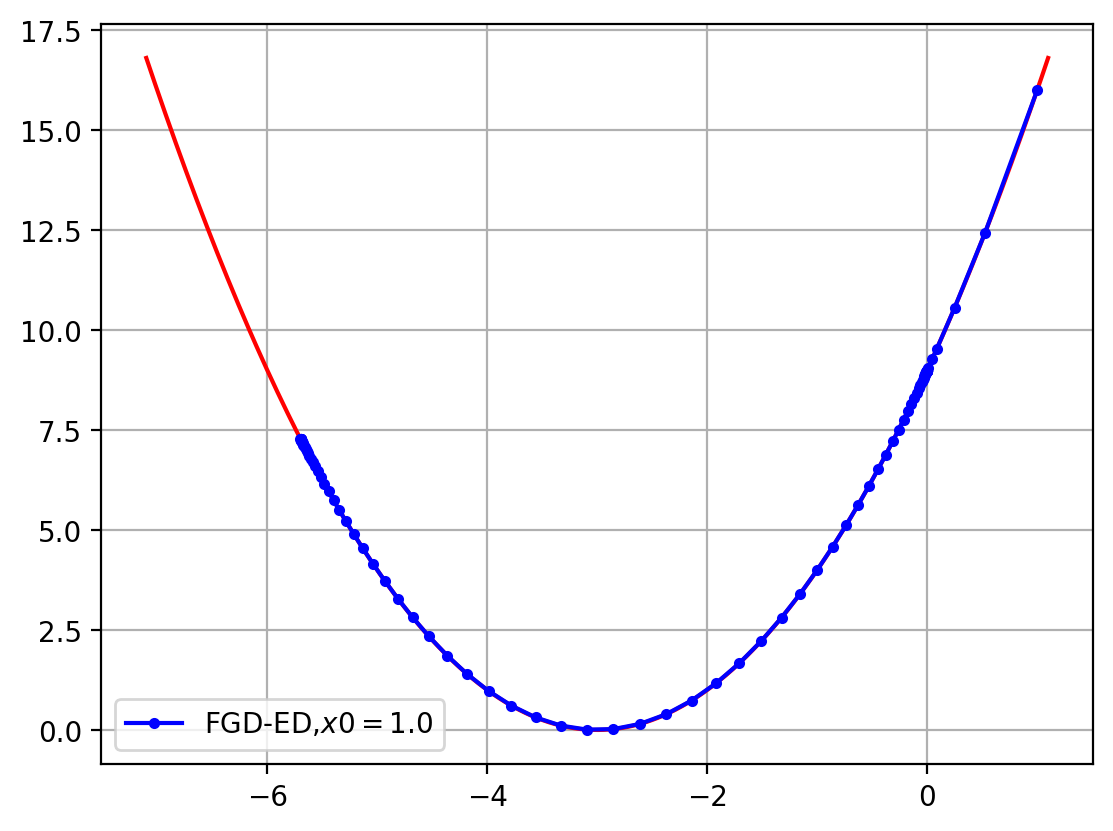

In [204]:
#FGD_ED
import matplotlib.pyplot as plt
import torch as t

fig = plt.figure(dpi=200)

x = t.arange(-7.1, 1.1,0.0001)
y = expression1_function(x)

x0 = 1.0
lr = 0.03
alpha = 0.1
max_iter = 100
epsilon=1e-8
k=0.5
x1,dif_x1 = FGD_ED(x0,lr,alpha,max_iter,epsilon,k)
print(x1)
y1 = expression1_function(t.tensor(x1))

x2,dif_x2 = FGD_ED(-7,lr,alpha,max_iter,epsilon,k)
print(x2)
y2 = expression1_function(t.tensor(x2))

# plt.xlim(-7.5, 1.5)
# plt.ylim(-0.5, 17)
# plt.xlim(-3.5, -2.5)
# plt.ylim(-0.01, 0.2)
# plt.ticklabel_format(axis='both', style='sci', scilimits=(2, 6))
plt.plot(x,y,color='red')
plt.plot(x1,y1,color='blue',marker='o',markersize=3,label='FGD-ED,$x0=1.0$')
# plt.plot(x2,y2,color='black',marker='s',markersize=3,label='FGD-ED,$x0=-7.0$')
# plt.plot(dif_x1,color='blue',marker='o',markersize=3,label='FGD,$x0=1.0$')
plt.legend()
plt.grid()